## First importing the libraries

In [1]:
!pip install geopy

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


## 1. Download and Explore Dataset

In [2]:
import requests
page = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
page

<Response [200]>

In [3]:
#check if upload is succesfull
page.status_code

200

In [4]:
#import Beautiful Soup
!pip install beautifulsoup4
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [5]:
html = list(soup.children)[2]

In [6]:
body = list(html.children)[3]

In [7]:
table=soup.find('table')
table

<table cellpadding="2" cellspacing="0" rules="all" style="width:100%; border-collapse:collapse; border:1px solid #ccc;">
<tbody><tr>
<td style="width:11%; vertical-align:top; color:#ccc;">
<p><b>M1A</b><br/><span style="font-size:85%;"><i>Not assigned</i></span>
</p>
</td>
<td style="width:11%; vertical-align:top; color:#ccc;">
<p><b>M2A</b><br/><span style="font-size:85%;"><i>Not assigned</i></span>
</p>
</td>
<td style="width:11%; vertical-align:top;">
<p><b>M3A</b><br/><span style="font-size:85%;"><a href="/wiki/North_York" title="North York">North York</a><br/>(<a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>)</span>
</p>
</td>
<td style="width:11%; vertical-align:top;">
<p><b>M4A</b><br/><span style="font-size:85%;"><a href="/wiki/North_York" title="North York">North York</a><br/>(<a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>)</span>
</p>
</td>
<td style="width:11%; vertical-align:top;">
<p><b>M5A</b><br/><span style="font-size:85%;"><a hr

In [8]:
#create a table 
table_contents=[]

#looks for a table on the website and extracts the text from that table (bt looking for the tags 'td'). Skip the 'not assigned'
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)
df=pd.DataFrame(table_contents)

In [9]:
df.shape

(103, 3)

In [10]:
df

Borough  \
0                                           North York   
1                                           North York   
2                                     Downtown Toronto   
3                                           North York   
4                                         Queen's Park   
5                                            Etobicoke   
6                                          Scarborough   
7                                           North York   
8                                            East York   
9                                     Downtown Toronto   
10                                          North York   
11                                           Etobicoke   
12                                         Scarborough   
13                                          North York   
14                                           East York   
15                                    Downtown Toronto   
16                                                York   
17                                           Etobicoke   
18                                         Scarborough   
19                                        East Toronto   
20                                    Downtown Toronto   
21                                                York   
22                                         Scarborough   
23                                           East York   
24                                    Downtown Toronto   
25                                    Downtown Toronto   
26                                         Scarborough   
27                                          North York   
28                                          North York   
29                                           East York   
30                                    Downtown Toronto   
31                                        West Toronto   
32                                         Scarborough   
33                                          North York   
34                                          North York   
35                               East YorkEast Toronto   
36                                    Downtown Toronto   
37                                        West Toronto   
38                                         Scarborough   
39                                          North York   
40                                          North York   
41                                        East Toronto   
42                                    Downtown Toronto   
43                                        West Toronto   
44                                         Scarborough   
45                                          North York   
46                                          North York   
47                                        East Toronto   
48                                    Downtown Toronto   
49                                          North York   
50                                          North York   
51                                         Scarborough   
52                                          North York   
53                                          North York   
54                                        East Toronto   
55                                          North York   
56                                                York   
57                                          North York   
58                                         Scarborough   
59                                          North York   
60                                          North York   
61                                     Central Toronto   
62                                     Central Toronto   
63                                                York   
64                                                York   
65                                         Scarborough   
66                                          North York   
67                                     Central Toronto   
68                                     Centra

In [11]:
# Repalce the strange values.
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df

Borough  \
0                North York   
1                North York   
2          Downtown Toronto   
3                North York   
4              Queen's Park   
5                 Etobicoke   
6               Scarborough   
7                North York   
8                 East York   
9          Downtown Toronto   
10               North York   
11                Etobicoke   
12              Scarborough   
13               North York   
14                East York   
15         Downtown Toronto   
16                     York   
17                Etobicoke   
18              Scarborough   
19             East Toronto   
20         Downtown Toronto   
21                     York   
22              Scarborough   
23                East York   
24         Downtown Toronto   
25         Downtown Toronto   
26              Scarborough   
27               North York   
28               North York   
29                East York   
30         Downtown Toronto   
31             West Toronto   
32              Scarborough   
33               North York   
34               North York   
35   East York/East Toronto   
36         Downtown Toronto   
37             West Toronto   
38              Scarborough   
39               North York   
40               North York   
41             East Toronto   
42         Downtown Toronto   
43             West Toronto   
44              Scarborough   
45               North York   
46               North York   
47             East Toronto   
48         Downtown Toronto   
49               North York   
50               North York   
51              Scarborough   
52               North York   
53               North York   
54             East Toronto   
55               North York   
56                     York   
57               North York   
58              Scarborough   
59               North York   
60               North York   
61          Central Toronto   
62          Central Toronto   
63                     York   
64                     York   
65              Scarborough   
66               North York   
67          Central Toronto   
68          Central Toronto   
69             West Toronto   
70                Etobicoke   
71              Scarborough   
72               North York   
73          Central Toronto   
74          Central Toronto   
75             West Toronto   
76              Mississauga   
77                Etobicoke   
78              Scarborough   
79          Central Toronto   
80         Downtown Toronto   
81             West Toronto   
82              Scarborough   
83          Central Toronto   
84         Downtown Toronto   
85              Scarborough   
86          Central Toronto   
87         Downtown Toronto   
88                Etobicoke   
89                Etobicoke   
90              Scarborough   
91         Downtown Toronto   
92   Downtown Toronto Stn A   
93                Etobicoke   
94      Etobicoke Northwest   
95              Scarborough   
96         Downtown Toronto   
97         Downtown Toronto   
98                Etobicoke   
99         Downtown Toronto   
100   East Toronto Business   
101               Etobicoke   
102               Etobicoke   

                                          Neighborhood PostalCode  
0                                            Parkwoods        M3A  
1                                     Victoria Village        M4A  
2                            Regent Park, Harbourfront        M5A  
3                     Lawrence Manor, Lawrence Heights        M6A  
4                        Ontario Provincial Government        M7A  
5                                     Islington Avenue        M9A  
6                                       Malvern, Rouge        M1B  
7                                      Don Mills North        M3B  
8                      Parkview Hill, Woodbine Gardens        M4B  
9                             Garden District, Ryerson        M5B  
10                                           Gl

In [12]:
# Sorting the columns so that the match the example in the assignment
df=df[['PostalCode', 'Borough','Neighborhood']]
df

PostalCode                 Borough  \
0          M3A              North York   
1          M4A              North York   
2          M5A        Downtown Toronto   
3          M6A              North York   
4          M7A            Queen's Park   
5          M9A               Etobicoke   
6          M1B             Scarborough   
7          M3B              North York   
8          M4B               East York   
9          M5B        Downtown Toronto   
10         M6B              North York   
11         M9B               Etobicoke   
12         M1C             Scarborough   
13         M3C              North York   
14         M4C               East York   
15         M5C        Downtown Toronto   
16         M6C                    York   
17         M9C               Etobicoke   
18         M1E             Scarborough   
19         M4E            East Toronto   
20         M5E        Downtown Toronto   
21         M6E                    York   
22         M1G             Scarborough   
23         M4G               East York   
24         M5G        Downtown Toronto   
25         M6G        Downtown Toronto   
26         M1H             Scarborough   
27         M2H              North York   
28         M3H              North York   
29         M4H               East York   
30         M5H        Downtown Toronto   
31         M6H            West Toronto   
32         M1J             Scarborough   
33         M2J              North York   
34         M3J              North York   
35         M4J  East York/East Toronto   
36         M5J        Downtown Toronto   
37         M6J            West Toronto   
38         M1K             Scarborough   
39         M2K              North York   
40         M3K              North York   
41         M4K            East Toronto   
42         M5K        Downtown Toronto   
43         M6K            West Toronto   
44         M1L             Scarborough   
45         M2L              North York   
46         M3L              North York   
47         M4L            East Toronto   
48         M5L        Downtown Toronto   
49         M6L              North York   
50         M9L              North York   
51         M1M             Scarborough   
52         M2M              North York   
53         M3M              North York   
54         M4M            East Toronto   
55         M5M              North York   
56         M6M                    York   
57         M9M              North York   
58         M1N             Scarborough   
59         M2N              North York   
60         M3N              North York   
61         M4N         Central Toronto   
62         M5N         Central Toronto   
63         M6N                    York   
64         M9N                    York   
65         M1P             Scarborough   
66         M2P              North York   
67         M4P         Central Toronto   
68         M5P         Central Toronto   
69         M6P            West Toronto   
70         M9P               Etobicoke   
71         M1R             Scarborough   
72         M2R              North York   
73         M4R         Central Toronto   
74         M5R         Central Toronto   
75         M6R            West Toronto   
76         M7R             Mississauga   
77         M9R               Etobicoke   
78         M1S             Scarborough   
79         M4S         Central Toronto   
80         M5S        Downtown Toronto   
81         M6S            West Toronto   
82         M1T             Scarborough   
83         M4T         Central Toronto   
84         M5T        Downtown Toronto   
85         M1V             Scarborough   
86         M4V         Central Toronto   
87         M5V        Downtown Toronto   
88         M8V               Etobicoke   
89         M9V               Etobicoke   
90         M1W             Scarborough   
91         M4W        Downtown Toronto   
92         M5W  Downtown Toronto Stn A   
93         M8W               Etobicoke   
94         M9W

In [13]:
df.shape

(103, 3)

## 2. Geospatial data

In [14]:
!pip install geocoder

# import geocoder
import geocoder

In [15]:
# initialize your variable to None
lat_lng_coords = None

g = geocoder.google('Toronto, Ontario')
print(g.latlng)

None


Use csv file

In [16]:
# as I got only "None" I use the csv file
path="https://cocl.us/Geospatial_data"

In [17]:
df_lat_lon = pd.read_csv(path)
df_lat_lon.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [18]:
# Change the header to be able to combine the tables (same key)
df_lat_lon.rename (columns = {'Postal Code':'PostalCode'}, inplace = True)
df_lat_lon.head()

PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476

In [19]:
#join the tables with Postal Codes and geo-data
df_new=df.set_index('PostalCode').join(df_lat_lon.set_index('PostalCode'))

In [20]:
df_new

Borough  \
PostalCode                           
M3A                     North York   
M4A                     North York   
M5A               Downtown Toronto   
M6A                     North York   
M7A                   Queen's Park   
M9A                      Etobicoke   
M1B                    Scarborough   
M3B                     North York   
M4B                      East York   
M5B               Downtown Toronto   
M6B                     North York   
M9B                      Etobicoke   
M1C                    Scarborough   
M3C                     North York   
M4C                      East York   
M5C               Downtown Toronto   
M6C                           York   
M9C                      Etobicoke   
M1E                    Scarborough   
M4E                   East Toronto   
M5E               Downtown Toronto   
M6E                           York   
M1G                    Scarborough   
M4G                      East York   
M5G               Downtown Toronto   
M6G               Downtown Toronto   
M1H                    Scarborough   
M2H                     North York   
M3H                     North York   
M4H                      East York   
M5H               Downtown Toronto   
M6H                   West Toronto   
M1J                    Scarborough   
M2J                     North York   
M3J                     North York   
M4J         East York/East Toronto   
M5J               Downtown Toronto   
M6J                   West Toronto   
M1K                    Scarborough   
M2K                     North York   
M3K                     North York   
M4K                   East Toronto   
M5K               Downtown Toronto   
M6K                   West Toronto   
M1L                    Scarborough   
M2L                     North York   
M3L                     North York   
M4L                   East Toronto   
M5L               Downtown Toronto   
M6L                     North York   
M9L                     North York   
M1M                    Scarborough   
M2M                     North York   
M3M                     North York   
M4M                   East Toronto   
M5M                     North York   
M6M                           York   
M9M                     North York   
M1N                    Scarborough   
M2N                     North York   
M3N                     North York   
M4N                Central Toronto   
M5N                Central Toronto   
M6N                           York   
M9N                           York   
M1P                    Scarborough   
M2P                     North York   
M4P                Central Toronto   
M5P                Central Toronto   
M6P                   West Toronto   
M9P                      Etobicoke   
M1R                    Scarborough   
M2R                     North York   
M4R                Central Toronto   
M5R                Central Toronto   
M6R                   West Toronto   
M7R                    Mississauga   
M9R                      Etobicoke   
M1S                    Scarborough   
M4S                Central Toronto   
M5S               Downtown Toronto   
M6S                   West Toronto   
M1T                    Scarborough   
M4T                Central Toronto   
M5T               Downtown Toronto   
M1V                    Scarborough   
M4V                Central Toronto   
M5V               Downtown Toronto   
M8V                      Etobicoke   
M9V                      Etobicoke   
M1W                    Scarborough   
M4W               Downtown Toronto   
M5W         Downtown Toronto Stn A   
M8W                      Etobicoke   
M9W            Etobicoke Northwest   
M1X                    Scarborough   
M4X               Downtown Toronto   
M5X               Downtown Toronto   
M8X                      Etobicoke   
M4Y               Downtown Toronto   
M7Y          East Toronto Business   
M8Y                      Etobicoke   
M8Z                      Etobicoke   

                                    

In [21]:
df_new.shape
#nb: as Postal Code is the key now, it gaves 4 columns.

(103, 4)

In [22]:
#Let's make a new dataframe with only the Boroughs that contain 'Toronto in the text'
df_Toronto=df_new[df_new['Borough'].str.contains("Toronto")]

In [23]:
df_Toronto.shape

(39, 4)

In [24]:
df_Toronto.head()

Borough               Neighborhood   Latitude  Longitude
PostalCode                                                                   
M5A         Downtown Toronto  Regent Park, Harbourfront  43.654260 -79.360636
M5B         Downtown Toronto   Garden District, Ryerson  43.657162 -79.378937
M5C         Downtown Toronto             St. James Town  43.651494 -79.375418
M4E             East Toronto                The Beaches  43.676357 -79.293031
M5E         Downtown Toronto                Berczy Park  43.644771 -79.373306

In [25]:
#Just to make Postal code a header again and have a logical numbering
df_Toronto.reset_index()

PostalCode                 Borough  \
0         M5A        Downtown Toronto   
1         M5B        Downtown Toronto   
2         M5C        Downtown Toronto   
3         M4E            East Toronto   
4         M5E        Downtown Toronto   
5         M5G        Downtown Toronto   
6         M6G        Downtown Toronto   
7         M5H        Downtown Toronto   
8         M6H            West Toronto   
9         M4J  East York/East Toronto   
10        M5J        Downtown Toronto   
11        M6J            West Toronto   
12        M4K            East Toronto   
13        M5K        Downtown Toronto   
14        M6K            West Toronto   
15        M4L            East Toronto   
16        M5L        Downtown Toronto   
17        M4M            East Toronto   
18        M4N         Central Toronto   
19        M5N         Central Toronto   
20        M4P         Central Toronto   
21        M5P         Central Toronto   
22        M6P            West Toronto   
23        M4R         Central Toronto   
24        M5R         Central Toronto   
25        M6R            West Toronto   
26        M4S         Central Toronto   
27        M5S        Downtown Toronto   
28        M6S            West Toronto   
29        M4T         Central Toronto   
30        M5T        Downtown Toronto   
31        M4V         Central Toronto   
32        M5V        Downtown Toronto   
33        M4W        Downtown Toronto   
34        M5W  Downtown Toronto Stn A   
35        M4X        Downtown Toronto   
36        M5X        Downtown Toronto   
37        M4Y        Downtown Toronto   
38        M7Y   East Toronto Business   

                                         Neighborhood   Latitude  Longitude  
0                           Regent Park, Harbourfront  43.654260 -79.360636  
1                            Garden District, Ryerson  43.657162 -79.378937  
2                                      St. James Town  43.651494 -79.375418  
3                                         The Beaches  43.676357 -79.293031  
4                                         Berczy Park  43.644771 -79.373306  
5                                  Central Bay Street  43.657952 -79.387383  
6                                            Christie  43.669542 -79.422564  
7                            Richmond, Adelaide, King  43.650571 -79.384568  
8                        Dufferin, Dovercourt Village  43.669005 -79.442259  
9                                  The Danforth  East  43.685347 -79.338106  
10  Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752  
11                           Little Portugal, Trinity  43.647927 -79.419750  
12                       The Danforth West, Riverdale  43.679557 -79.352188  
13           Toronto Dominion Centre, Design Exchange  43.647177 -79.381576  
14       Brockton, Parkdale Village, Exhibition Place  43.636847 -79.428191  
15                     India Bazaar, The Beaches West  43.668999 -79.315572  
16                     Commerce Court, Victoria Hotel  43.648198 -79.379817  
17                                    Studio District  43.659526 -79.340923  
18                                      Lawrence Park  43.728020 -79.388790  
19                                           Roselawn  43.711695 -79.416936  
20                                   Davisville North  43.712751 -79.390197  
21                           Forest Hill North & West  43.696948 -79.411307  
22                      High Park, The Junction South  43.661608 -79.464763  
23                                 North Toronto West  43.715383 -79.405678  
24                The Annex, North Midtown, Yorkville  43.672710 -79.405678  
25                             Parkdale, Roncesvalles  43.648960 -79.456325  
26                                         Davisville  43.704324 -79.388790  
27                     University of Toronto, Harbord  43.662696 -79.400049  
28                                 Runnymede, Swansea  43.651571 -79.484450  
29                    

# 3. Create a map

In [26]:
# In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.
# I take Central Toronto as a start
address = 'Central Toronto'

geolocator = Nominatim(user_agent="Tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Central Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Central Toronto are 43.6534817, -79.3839347.


In [27]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Toronto['Latitude'], df_Toronto['Longitude'], df_Toronto['Borough'], df_Toronto['Neighborhood']):
    label = '{}, {}'.format(df_Toronto, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)
    
map_Toronto

<img src="Map1Toronto.png">

In [28]:
#Let's explore. First define credentials and verion
CLIENT_ID = 'LIJCGCX4H40R0QVWEZCU2ZZO5IYCUQG2E2NKPJIGEMSS234I' # your Foursquare ID
CLIENT_SECRET = 'D2UU1ZVSRSR4A5AGCGQX013WERLOFY1DG2H4STBSETCAUN4F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LIJCGCX4H40R0QVWEZCU2ZZO5IYCUQG2E2NKPJIGEMSS234I
CLIENT_SECRET:D2UU1ZVSRSR4A5AGCGQX013WERLOFY1DG2H4STBSETCAUN4F


# 4. Create a function to get the venues in the neighborhood

In [29]:
#Let's create a function to explore all the neighborhoods in Toronto
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called Toronto_venues.

In [30]:
# run
Toronto_venues = getNearbyVenues(names=df_Toronto['Neighborhood'],
                                   latitudes=df_Toronto['Latitude'],
                                   longitudes=df_Toronto['Longitude'])

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Enclave of M5E
St. James Town, Cabbagetown
First Canadi

In [31]:
# check the shape and contents
print(Toronto_venues.shape)
Toronto_venues.head()

(1574, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Regent Park, Harbourfront               43.65426              -79.360636   
1  Regent Park, Harbourfront               43.65426              -79.360636   
2  Regent Park, Harbourfront               43.65426              -79.360636   
3  Regent Park, Harbourfront               43.65426              -79.360636   
4  Regent Park, Harbourfront               43.65426              -79.360636   

                    Venue  Venue Latitude  Venue Longitude  \
0           Tandem Coffee       43.653559       -79.361809   
1        Roselle Desserts       43.653447       -79.362017   
2  Cooper Koo Family YMCA       43.653249       -79.358008   
3          Impact Kitchen       43.656369       -79.356980   
4     Body Blitz Spa East       43.654735       -79.359874   

        Venue Category  
0          Coffee Shop  
1               Bakery  
2  Distribution Center  
3           Restaurant  
4                  Spa

In [32]:
#Let's check how many venues were returned for each neighborhood
Toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Berczy Park                                                            57   
Brockton, Parkdale Village, Exhibition Place                           23   
CN Tower, King and Spadina, Railway Lands, Harb...                     14   
Central Bay Street                                                     64   
Christie                                                               16   
Church and Wellesley                                                   70   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             34   
Davisville North                                                        8   
Dufferin, Dovercourt Village                                           14   
Enclave of M4L                                                         19   
Enclave of M5E                                                         99   
First Canadian Place, Underground city                                100   
Forest Hill North & West                                                4   
Garden District, Ryerson                                              100   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          24   
India Bazaar, The Beaches West                                         20   
Kensington Market, Chinatown, Grange Park                              61   
Lawrence Park                                                           3   
Little Portugal, Trinity                                               44   
Moore Park, Summerhill East                                             4   
North Toronto West                                                     16   
Parkdale, Roncesvalles                                                 15   
Regent Park, Harbourfront                                              45   
Richmond, Adelaide, King                                               93   
Rosedale                                                                4   
Roselawn                                                                3   
Runnymede, Swansea                                                     38   
St. James Town                                                         78   
St. James Town, Cabbagetown                                            44   
Studio District                                                        38   
Summerhill West, Rathnelly, South Hill, Forest ...                     15   
The Annex, North Midtown, Yorkville                                    22   
The Beaches                                                             5   
The Danforth  East                                                      4   
The Danforth West, Riverdale                                           43   
Toronto Dominion Centre, Design Exchange                              100   
University of Toronto, Harbord                                         33   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Berczy Park                                                             57   
Brockton, Parkdale Village, Exhibition Place                            23   
CN Tower, King and Spadina, Railway Lands, Harb...                      14   
Central Bay Street                                                      64   
Christie                                                                16   
Church and Wellesley                                                    70   
Commerce Court, Victoria Hotel                                         100   
Davisville                                                              34   
Davisville North                                                         8   
Dufferin, Dovercourt Village        

In [33]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 233 uniques categories.


# 5. Analyze Each Neighborhood

In [116]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

Toronto_onehot.head()

Airport  Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0        0                   0             0               0                0   
1        0                   0             0               0                0   
2        0                   0             0               0                0   
3        0                   0             0               0                0   
4        0                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0              0          0           0           0       0     0    0   
1              0          0           0           0       1     0    0   
2              0          0           0           0       0     0    0   
3              0          0           0           0       0     0    0   
4              0          0           0           0       0     0    0   

   Baseball Stadium  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0                 0                   0      0                0         0   
1                 0                   0      0                0         0   
2                 0                   0      0                0         0   
3                 0                   0      0                0         0   
4                 0                   0      0                0         0   

   Beer Store  Belgian Restaurant  Bistro  Boat or Ferry  Bookstore  Boutique  \
0           0                   0       0              0          0         0   
1           0                   0       0              0          0         0   
2           0                   0       0              0          0         0   
3           0                   0       0              0          0         0   
4           0                   0       0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                     0               0        0                0         0   
1                     0               0        0                0         0   
2                     0               0        0                0         0   
3                     0               0        0                0         0   
4                     0               0        0                0         0   

   Burger Joint  Burrito Place  Bus Line  Butcher  Café  \
0             0              0         0        0     0   
1             0              0         0        0     0   
2             0              0         0        0     0   
3             0              0         0        0     0   
4             0              0         0        0     0   

   Cajun / Creole Restaurant  Candy Store  Caribbean Restaurant  Cheese Shop  \
0                          0            0                     0            0   
1                          0            0                     0            0   
2                          0            0                     0            0   
3                          

In [228]:
Toronto_onehot.shape

(1574, 233)

In [229]:
# move neighborhood column to the first colum n
fixed_columns = [Toronto_onehot.columns[-73]] + list(Toronto_onehot.columns[:-73]) + list(Toronto_onehot.columns[-72:])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

Movie Theater  Museum  Music Venue               Neighborhood  Airport  \
0              0       0            0  Regent Park, Harbourfront        0   
1              0       0            0  Regent Park, Harbourfront        0   
2              0       0            0  Regent Park, Harbourfront        0   
3              0       0            0  Regent Park, Harbourfront        0   
4              0       0            0  Regent Park, Harbourfront        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0              0          0           0           0       0     0    0   
1              0          0           0           0       1     0    0   
2              0          0           0           0       0     0    0   
3              0          0           0           0       0     0    0   
4              0          0           0           0       0     0    0   

   Baseball Stadium  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0                 0                   0      0                0         0   
1                 0                   0      0                0         0   
2                 0                   0      0                0         0   
3                 0                   0      0                0         0   
4                 0                   0      0                0         0   

   Beer Store  Belgian Restaurant  Bistro  Boat or Ferry  Bookstore  Boutique  \
0           0                   0       0              0          0         0   
1           0                   0       0              0          0         0   
2           0                   0       0              0          0         0   
3           0                   0       0              0          0         0   
4           0                   0       0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                     0               0        0                0         0   
1                     0               0        0                0         0   
2                     0               0        0                0         0   
3                     0               0        0                0         0   
4                     0               0        0                0         0   

   Burger Joint  Burrito Place  Bus Line  Butcher  Café  \
0             0              0         0        0     0   
1             0              0         0        0     0   
2             0              0         0        0     0   
3             0              0         0        0     0  

In [230]:
#Let's check the size
Toronto_onehot.shape

(1574, 233)

In [231]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

Neighborhood  Movie Theater  \
0                                         Berczy Park       0.000000   
1        Brockton, Parkdale Village, Exhibition Place       0.000000   
2   CN Tower, King and Spadina, Railway Lands, Har...       0.000000   
3                                  Central Bay Street       0.000000   
4                                            Christie       0.000000   
5                                Church and Wellesley       0.000000   
6                      Commerce Court, Victoria Hotel       0.000000   
7                                          Davisville       0.000000   
8                                    Davisville North       0.000000   
9                        Dufferin, Dovercourt Village       0.000000   
10                                     Enclave of M4L       0.000000   
11                                     Enclave of M5E       0.010101   
12             First Canadian Place, Underground city       0.000000   
13                           Forest Hill North & West       0.000000   
14                           Garden District, Ryerson       0.010000   
15  Harbourfront East, Union Station, Toronto Islands       0.000000   
16                      High Park, The Junction South       0.000000   
17                     India Bazaar, The Beaches West       0.050000   
18          Kensington Market, Chinatown, Grange Park       0.000000   
19                                      Lawrence Park       0.000000   
20                           Little Portugal, Trinity       0.000000   
21                        Moore Park, Summerhill East       0.000000   
22                                 North Toronto West       0.000000   
23                             Parkdale, Roncesvalles       0.066667   
24                          Regent Park, Harbourfront       0.000000   
25                           Richmond, Adelaide, King       0.000000   
26                                           Rosedale       0.000000   
27                                           Roselawn       0.000000   
28                                 Runnymede, Swansea       0.000000   
29                                     St. James Town       0.000000   
30                        St. James Town, Cabbagetown       0.000000   
31                                    Studio District       0.000000   
32  Summerhill West, Rathnelly, South Hill, Forest...       0.000000   
33                The Annex, North Midtown, Yorkville       0.000000   
34                                        The Beaches       0.000000   
35                                 The Danforth  East       0.000000   
36                       The Danforth West, Riverdale       0.000000   
37           Toronto Dominion Centre, Design Exchange       0.000000   
38                     University of Toronto, Harbord       0.000000   

      Museum  Music Venue   Airport  Airport Food Court  Airport Gate  \
0   0.017544     0.000000  0.000000            0.000000      0.000000   
1   0.000000     0.000000  0.000000            0.000000      0.000000   
2   0.000000     0.000000  0.071429            0.071429      0.071429   
3   0.000000     0.000000  0.000000            0.000000      0.000000   
4   0.000000     0.000000  0.000000            0.000000      0.000000   
5   0.000000     0.000000  0.000000            0.000000      0.000000   
6   0.010000     0.000000  0.000000            0.000000      0.000000   
7   0.000000     0.000000  0.000000            0.000000      0.000000   
8   0.000000     0.000000  0.000000            0.000000      0.000000   
9   0.000000     0.071429  0.000000            0.000000      0.000000   
10  0.000000     0.000000  0.000000            0.000000      0.000000   
11  0.010101     0.000000  0.000000            0.000000      0.000000   
12  0.010000     0.000000  0.000000            0.000000      0.000000   
13  0.000000     0.000000  0.000000            0.000000      0.000000   
14  0.000000     0.010000  0.000000            0.000000      0.00

In [232]:
#check how many groups (should be 39)
Toronto_grouped.shape

(39, 233)

In [233]:
#Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.07
1  Cocktail Bar  0.05
2        Bakery  0.05
3    Restaurant  0.04
4   Cheese Shop  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.13
1  Breakfast Spot  0.09
2     Coffee Shop  0.09
3   Burrito Place  0.04
4         Stadium  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0       Airport Lounge  0.14
1      Airport Service  0.14
2        Boat or Ferry  0.07
3  Rental Car Location  0.07
4      Harbor / Marina  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.17
1  Italian Restaurant  0.05
2      Sandwich Place  0.05
3                Café  0.05
4    Department Store  0.03


----Christie----
                venue  freq
0       Grocery Store  0.25
1                Café  0.19
2                Park  0.12
3  Athletics & Sports  0.06
4 

In [234]:
#Let's put that into a _pandas_ dataframe

#First, let's write a function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [235]:
#Now let's create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Berczy Park           Coffee Shop   
1       Brockton, Parkdale Village, Exhibition Place                  Café   
2  CN Tower, King and Spadina, Railway Lands, Har...        Airport Lounge   
3                                 Central Bay Street           Coffee Shop   
4                                           Christie         Grocery Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                Bakery          Cocktail Bar           Cheese Shop   
1        Breakfast Spot           Coffee Shop          Climbing Gym   
2       Airport Service           Coffee Shop   Rental Car Location   
3        Sandwich Place    Italian Restaurant                  Café   
4                  Café                  Park           Candy Store   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0        Farmers Market              Beer Bar    Seafood Restaurant   
1         Burrito Place            Restaurant    Italian Restaurant   
2                 Plane      Sculpture Garden      Airport Terminal   
3       Thai Restaurant       Bubble Tea Shop   Japanese Restaurant   
4            Baby Store    Athletics & Sports    Italian Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0              Pharmacy            Restaurant                  Diner  
1               Stadium                   Bar                 Bakery  
2       Harbor / Marina          Airport Gate     Airport Food Court  
3          Burger Joint      Department Store            Salad Place  
4             Nightclub            Restaurant            Coffee Shop

In [236]:
neighborhoods_venues_sorted.shape

(39, 11)

## 6. Cluster Neighborhoods

Run _k_-means to cluster the neighborhood into 5 clusters.

In [237]:
# set number of clusters
# I tried differnt k's, as k=5 gave many neighbourhood's in one cluster. With k=10 I at least have 2 bigger clusters. 
kclusters = 10

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 2, 0, 2, 0, 0, 2, 8, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [238]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) 

In [239]:
Toronto_merged = df_Toronto

# merge Toronto_grouped with Toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_merged.head() # check the last columns!

Borough               Neighborhood   Latitude  Longitude  \
PostalCode                                                                      
M5A         Downtown Toronto  Regent Park, Harbourfront  43.654260 -79.360636   
M5B         Downtown Toronto   Garden District, Ryerson  43.657162 -79.378937   
M5C         Downtown Toronto             St. James Town  43.651494 -79.375418   
M4E             East Toronto                The Beaches  43.676357 -79.293031   
M5E         Downtown Toronto                Berczy Park  43.644771 -79.373306   

            Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
PostalCode                                                               
M5A                      0           Coffee Shop                Bakery   
M5B                      0        Clothing Store           Coffee Shop   
M5C                      0                  Café           Coffee Shop   
M4E                      9           Pizza Place                 Trail   
M5E                      0           Coffee Shop                Bakery   

           3rd Most Common Venue 4th Most Common Venue  \
PostalCode                                               
M5A                          Pub                  Park   
M5B                         Café       Bubble Tea Shop   
M5C                    Gastropub        Cosmetics Shop   
M4E                          Pub     Health Food Store   
M5E                 Cocktail Bar           Cheese Shop   

                  5th Most Common Venue 6th Most Common Venue  \
PostalCode                                                      
M5A                      Breakfast Spot                  Café   
M5B           Middle Eastern Restaurant        Cosmetics Shop   
M5C                        Cocktail Bar                  Park   
M4E         Eastern European Restaurant   Dumpling Restaurant   
M5E                      Farmers Market              Beer Bar   

           7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
PostalCode                                                                     
M5A                      Theater          Dessert Shop            Shoe Store   
M5B           Italian Restaurant   Japanese Restaurant             Bookstore   
M5C           Italian Restaurant                   Gym              Beer Bar   
M4E                   Donut Shop     Electronics Store         Deli / Bodega   
M5E           Seafood Restaurant              Pharmacy            Restaurant   

           10th Most Common Venue  
PostalCode                         
M5A                    Restaurant  
M5B              Ramen Restaurant  
M5C           American Restaurant  
M4E              Doner Restaurant  
M5E                         Diner

In [254]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

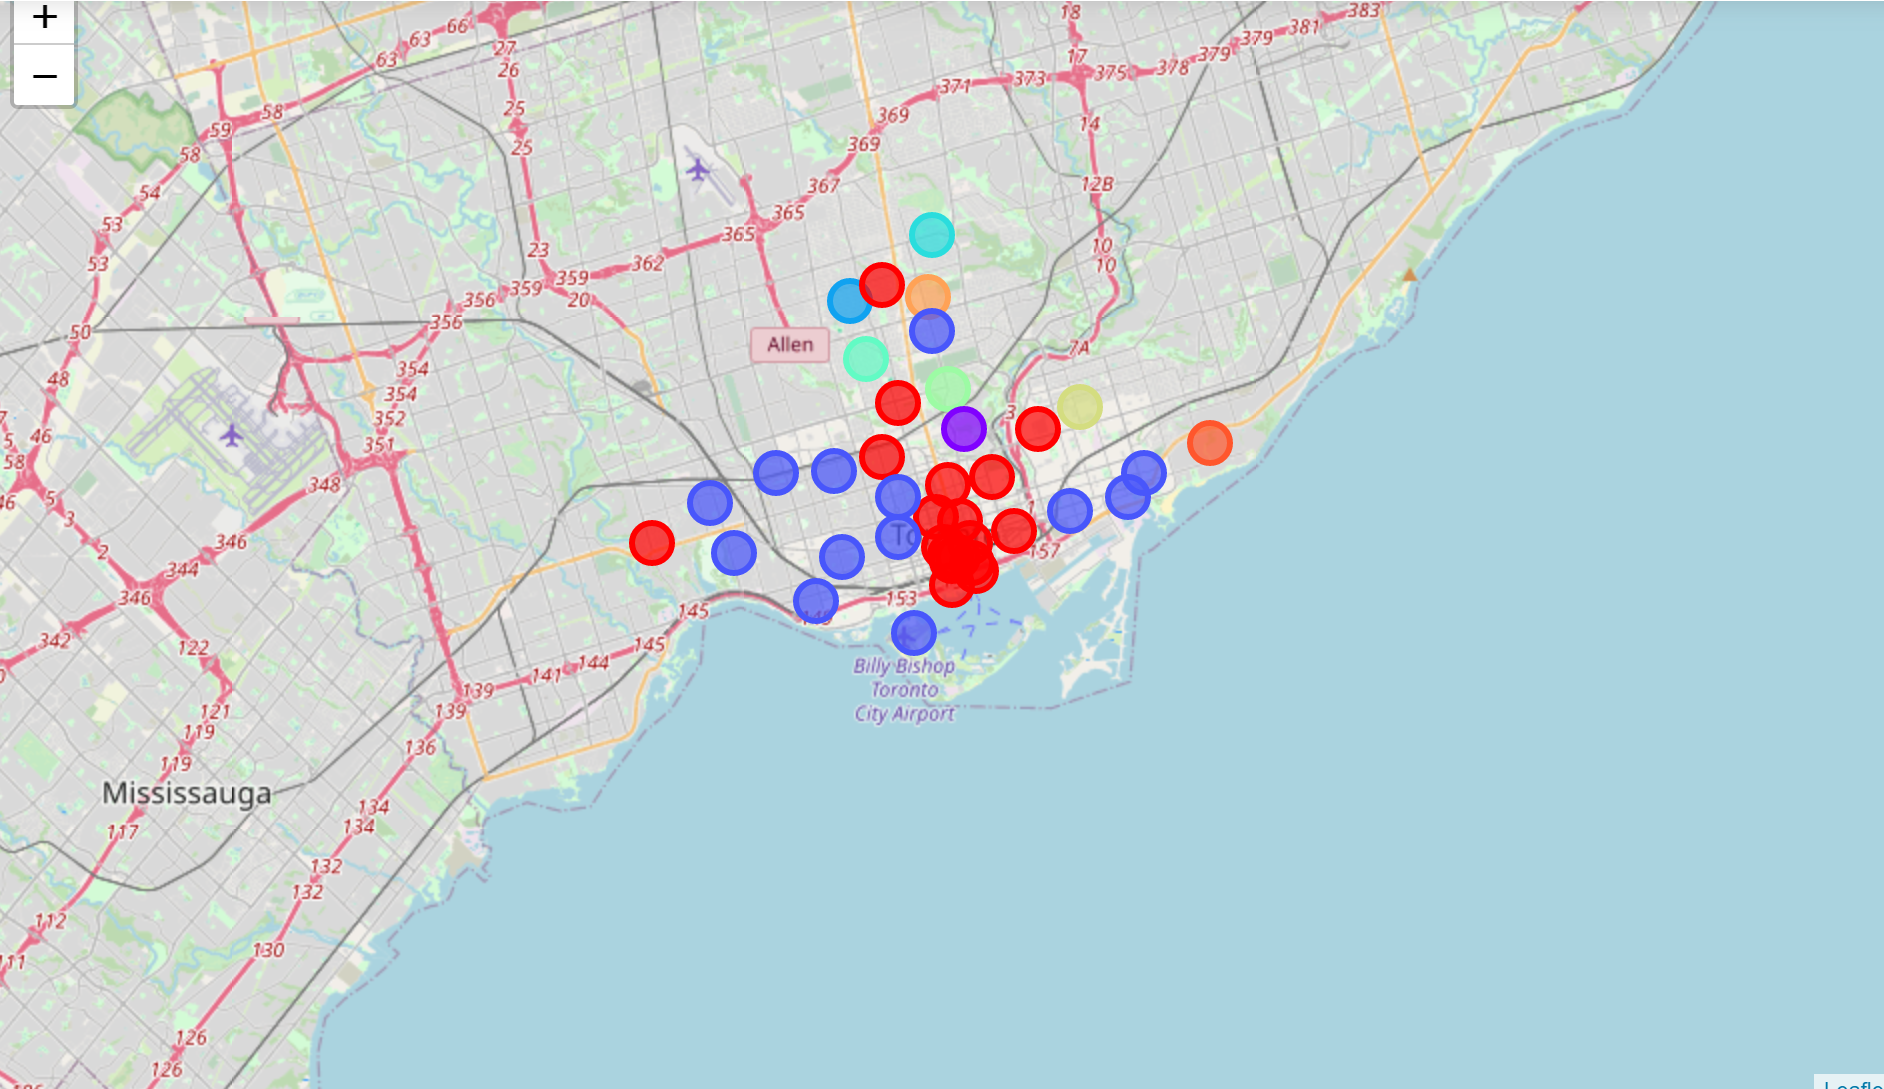

## 7. Examine Clusters

Now, wecan examine each cluster and determine the discriminating venue categories that distinguish each cluster. 
Based on the defining categories, we can then assign a name to each cluster. 

## Cluster 1: Lots of coffee, cocktail and (mostly) western food 

In [241]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood  \
PostalCode                                                      
M5A                                 Regent Park, Harbourfront   
M5B                                  Garden District, Ryerson   
M5C                                            St. James Town   
M5E                                               Berczy Park   
M5G                                        Central Bay Street   
M5H                                  Richmond, Adelaide, King   
M5J         Harbourfront East, Union Station, Toronto Islands   
M4K                              The Danforth West, Riverdale   
M5K                  Toronto Dominion Centre, Design Exchange   
M5L                            Commerce Court, Victoria Hotel   
M4R                                        North Toronto West   
M5R                       The Annex, North Midtown, Yorkville   
M6S                                        Runnymede, Swansea   
M4V         Summerhill West, Rathnelly, South Hill, Forest...   
M5W                                            Enclave of M5E   
M4X                               St. James Town, Cabbagetown   
M5X                    First Canadian Place, Underground city   
M4Y                                      Church and Wellesley   

           1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
PostalCode                                                                     
M5A                  Coffee Shop                Bakery                   Pub   
M5B               Clothing Store           Coffee Shop                  Café   
M5C                         Café           Coffee Shop             Gastropub   
M5E                  Coffee Shop                Bakery          Cocktail Bar   
M5G                  Coffee Shop        Sandwich Place    Italian Restaurant   
M5H                  Coffee Shop                  Café            Restaurant   
M5J                  Coffee Shop              Aquarium                  Café   
M4K             Greek Restaurant           Coffee Shop    Italian Restaurant   
M5K                  Coffee Shop                 Hotel                  Café   
M5L                  Coffee Shop            Restaurant                 Hotel   
M4R                  Coffee Shop        Clothing Store           Yoga Studio   
M5R                  Coffee Shop                  Café        Sandwich Place   
M6S                         Café           Coffee Shop      Sushi Restaurant   
M4V                  Coffee Shop   American Restaurant   Fried Chicken Joint   
M5W                  Coffee Shop    Seafood Restaurant    Italian Restaurant   
M4X                  Coffee Shop                  Café           Pizza Place   
M5X                  Coffee Shop                  Café                 Hotel   
M4Y             Sushi Restaurant           Coffee Shop   Japanese Restaurant   

           4th Most Common Venue      5th Most Common Venue  \
PostalCode                                                    
M5A                         Park             Breakfast Spot   
M5B              Bubble Tea Shop  Middle Eastern Restaurant   
M5C               Cosmetics Shop               Cocktail Bar   
M5E                  Cheese Shop             Farmers Market   
M5G                         Café            Thai Restaurant   
M5H                Deli / Bodega                      Hotel   
M5J                        Hotel        Fried Chicken Joint   
M4K                   Restaurant                  Bookstore   
M5K           Seafood Restaurant                Salad Place   
M5L                         Café         Italian Restaurant   
M4R               Ice Cream Shop         Chinese Restaurant   
M5R                Grocery Store                  BBQ Joint   
M6S                          Pub                Pizza Place   
M4V             Sushi Restaurant                 Bagel Shop   
M5W                       Bakery                 Restaurant   
M4X                   Restaurant         Italian Restaurant   
M5X          

## Cluster 2: Park & Playground

In [250]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
PostalCode                                                            
M4W            Rosedale                  Park            Playground   

           3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
PostalCode                                                                     
M4W                        Trail           Yoga Studio      Department Store   

           6th Most Common Venue 7th Most Common Venue  \
PostalCode                                               
M4W                  Escape Room     Electronics Store   

                  8th Most Common Venue 9th Most Common Venue  \
PostalCode                                                      
M4W         Eastern European Restaurant   Dumpling Restaurant   

           10th Most Common Venue  
PostalCode                         
M4W                    Donut Shop

## Cluster 3: shops and 'non western' food

In [242]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood  \
PostalCode                                                      
M6G                                                  Christie   
M6H                              Dufferin, Dovercourt Village   
M6J                                  Little Portugal, Trinity   
M6K              Brockton, Parkdale Village, Exhibition Place   
M4L                            India Bazaar, The Beaches West   
M4M                                           Studio District   
M6P                             High Park, The Junction South   
M6R                                    Parkdale, Roncesvalles   
M4S                                                Davisville   
M5S                            University of Toronto, Harbord   
M5T                 Kensington Market, Chinatown, Grange Park   
M5V         CN Tower, King and Spadina, Railway Lands, Har...   
M7Y                                            Enclave of M4L   

           1st Most Common Venue 2nd Most Common Venue  \
PostalCode                                               
M6G                Grocery Store                  Café   
M6H                     Pharmacy                Bakery   
M6J                          Bar           Men's Store   
M6K                         Café        Breakfast Spot   
M4L                         Park         Movie Theater   
M4M                  Coffee Shop             Gastropub   
M6P           Mexican Restaurant                  Café   
M6R               Breakfast Spot             Gift Shop   
M4S                  Pizza Place        Sandwich Place   
M5S                         Café                Bakery   
M5T                         Café           Coffee Shop   
M5V               Airport Lounge       Airport Service   
M7Y           Light Rail Station      Recording Studio   

                    3rd Most Common Venue 4th Most Common Venue  \
PostalCode                                                        
M6G                                  Park           Candy Store   
M6H                         Grocery Store           Supermarket   
M6J                 Vietnamese Restaurant            Restaurant   
M6K                           Coffee Shop          Climbing Gym   
M4L                      Sushi Restaurant               Brewery   
M4M                                Bakery                  Café   
M6P                       Thai Restaurant         Grocery Store   
M6R                         Movie Theater          Dessert Shop   
M4S                          Dessert Shop           Coffee Shop   
M5S                                   Bar    Italian Restaurant   
M5T         Vegetarian / Vegan Restaurant    Mexican Restaurant   
M5V                           Coffee Shop   Rental Car Location   
M7Y                            Skate Park            Smoke Shop   

                    5th Most Common Venue      6th Most Common Venue  \
PostalCode                                                             
M6G                            Baby Store         Athletics & Sports   
M6H                 Portuguese Restaurant  Middle Eastern Restaurant   
M6J         Vegetarian / Vegan Restaurant                       Café   
M6K                         Burrito Place                 Restaurant   
M4L                        Sandwich Place                 Restaurant   
M4M                               Brewery        American Restaurant   
M6P                   Arts & Crafts Store                      Diner   
M6R           Eastern European Restaurant                        Bar   
M4S                                  Café         Italian Restaurant   
M5S                   Japanese Restaurant                  Bookstore   
M5T                 Vietnamese Restaurant                Gaming Cafe   
M5V                                 Plane           Sculpture Garden   
M7Y                               Brewery                        Spa   

           7th Most Common Venue      8th Most Common Venue  \
PostalCode                                          

## Cluster 4: Pools!

In [243]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
PostalCode                                                            
M5N            Roselawn  Fast Food Restaurant                  Pool   

           3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
PostalCode                                                                     
M5N                       Garden           Yoga Studio      Department Store   

           6th Most Common Venue 7th Most Common Venue  \
PostalCode                                               
M5N                  Escape Room     Electronics Store   

                  8th Most Common Venue 9th Most Common Venue  \
PostalCode                                                      
M5N         Eastern European Restaurant   Dumpling Restaurant   

           10th Most Common Venue  
PostalCode                         
M5N                    Donut Shop

## Cluster 5: Bus & Park

In [244]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
PostalCode                                                              
M4N         Lawrence Park              Bus Line                  Park   

           3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
PostalCode                                                                     
M4N                  Swim School          Dessert Shop  Ethiopian Restaurant   

           6th Most Common Venue 7th Most Common Venue  \
PostalCode                                               
M4N                  Escape Room     Electronics Store   

                  8th Most Common Venue 9th Most Common Venue  \
PostalCode                                                      
M4N         Eastern European Restaurant   Dumpling Restaurant   

           10th Most Common Venue  
PostalCode                         
M4N                    Donut Shop

## Cluster 6: Bling Bling

In [245]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 5, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
PostalCode                                                   
M5P         Forest Hill North & West         Jewelry Store   

           2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
PostalCode                                                                     
M5P                        Trail      Sushi Restaurant    Mexican Restaurant   

           5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
PostalCode                                                                     
M5P                  Yoga Studio          Dessert Shop           Escape Room   

           8th Most Common Venue        9th Most Common Venue  \
PostalCode                                                      
M5P            Electronics Store  Eastern European Restaurant   

           10th Most Common Venue  
PostalCode                         
M5P           Dumpling Restaurant

## Cluster 7: Legal

In [246]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 6, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
PostalCode                                                      
M4T         Moore Park, Summerhill East            Restaurant   

           2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
PostalCode                                                                     
M4T                       Lawyer          Tennis Court                 Trail   

           5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
PostalCode                                                                     
M4T             Doner Restaurant                 Diner        Discount Store   

           8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
PostalCode                                                                     
M4T          Distribution Center               Dog Run            Yoga Studio

## Cluster 8: Convenience stores & Metro

In [251]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 7, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
PostalCode                                                                   
M4J         The Danforth  East                  Park     Convenience Store   

           3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
PostalCode                                                                     
M4J                Metro Station           Yoga Studio                 Diner   

           6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
PostalCode                                                                     
M4J         Ethiopian Restaurant           Escape Room     Electronics Store   

                  9th Most Common Venue 10th Most Common Venue  
PostalCode                                                      
M4J         Eastern European Restaurant    Dumpling Restaurant

## Cluster 9: Department stores & Gyms

In [248]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 8, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
PostalCode                                                                 
M4P         Davisville North      Department Store                   Gym   

           3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
PostalCode                                                                     
M4P         Gym / Fitness Center                  Park     Food & Drink Shop   

           6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
PostalCode                                                                     
M4P               Breakfast Spot        Sandwich Place                 Hotel   

           9th Most Common Venue 10th Most Common Venue  
PostalCode                                               
M4P                      Dog Run         Discount Store

## Cluster 10: Trail

In [252]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 9, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
PostalCode                                                            
M4E         The Beaches           Pizza Place                 Trail   

           3rd Most Common Venue 4th Most Common Venue  \
PostalCode                                               
M4E                          Pub     Health Food Store   

                  5th Most Common Venue 6th Most Common Venue  \
PostalCode                                                      
M4E         Eastern European Restaurant   Dumpling Restaurant   

           7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
PostalCode                                                                     
M4E                   Donut Shop     Electronics Store         Deli / Bodega   

           10th Most Common Venue  
PostalCode                         
M4E              Doner Restaurant